In [60]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import os
from rasterio.transform import rowcol
import plotly.graph_objects as go
import seaborn as sns


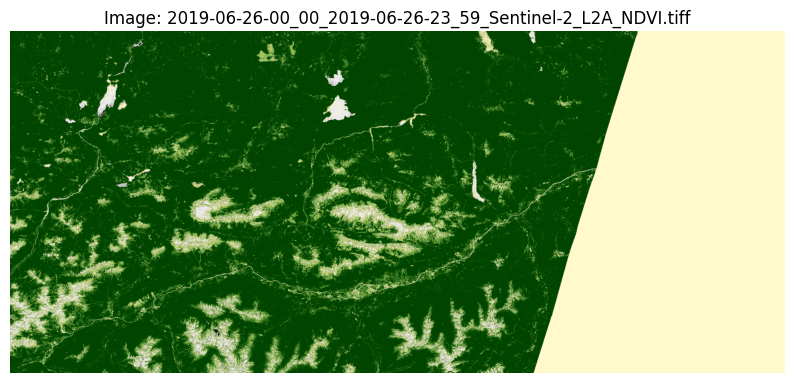

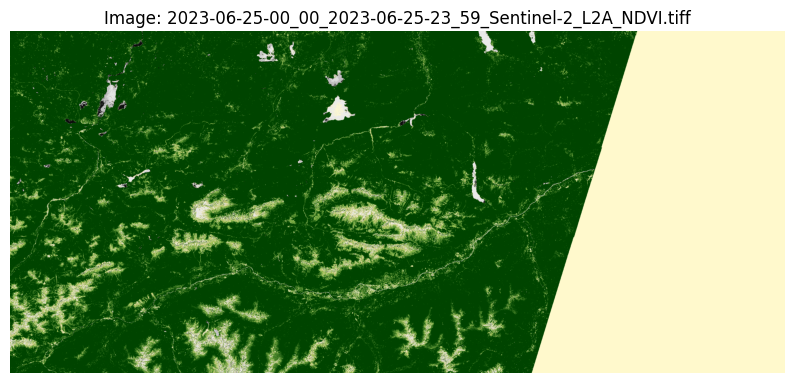

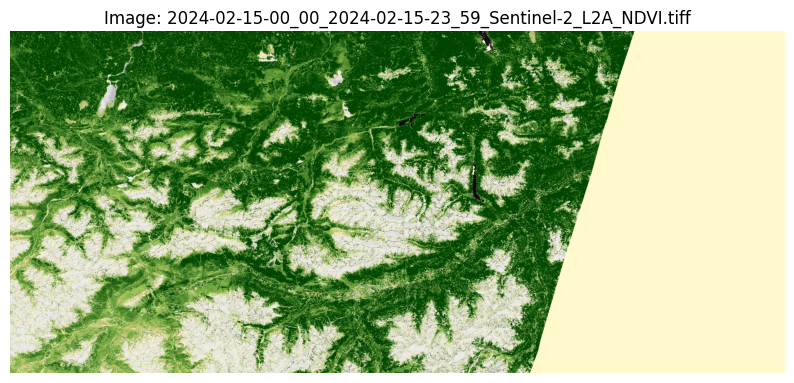

In [61]:
#With this function I am trying to gain some initial intuition by displaying all the images.
def display_tiff_images(directory):
    """
    Display each of the image
    
    Parameters:
    directory(str):The path to the dataset directory
    
    Returns:
    None
    
    """
    
    # List all TIFF files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".tiff"):  
            filepath = os.path.join(directory, filename)

            # Opening the TIFF file
            with rasterio.open(filepath) as src:
                image_data = src.read()  

                # Checking if the image is RGB
                if image_data.shape[0] == 3:
                    # Converting from (bands, height, width) to (height, width, bands)
                    image_data = np.transpose(image_data, (1, 2, 0))

                    # Displaying the image
                    plt.figure(figsize=(10, 10))
                    plt.imshow(image_data)
                    plt.title(f"Image: {filename}")
                    plt.axis('off')
                    plt.show()
                else:
                    print(f"{filename} is not a standard RGB image.")


directory_path = 'data'
display_tiff_images(directory_path)


In [62]:

def read_ndvi_from_file(file_path):
    """
    Reads data from GeoTIFF file
    
    Parameters:
    file_path(str): The path to the image file
    
    Returns:
    tuple: A tuple consisting of ndvi_data and affine
    """
    with rasterio.open(file_path) as src:
        ndvi_data = src.read(1)  
        affine = src.transform  
    return ndvi_data, affine


In [63]:
def extract_info(directory):
    """
    Extract ndvi data and geo-information
    
    Paramters:
    directory(str):The directory to dataset folder
    
    Returns:
    tuple:consists of ndvi, affine and geoinformation data.
    
    """
    
    results = []
    # List all TIFF files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".tiff"):  # or ".tiff", if needed
            filepath = os.path.join(directory, filename)

            # Reading NDVI data and affine transformation using the new function
            ndvi_data, affine = read_ndvi_from_file(filepath)

            with rasterio.open(filepath) as src:
                geoinfo = {
                    'crs': src.crs,
                    'transform': src.transform,
                    'bounds': src.bounds,
                    'width': src.width,
                    'height': src.height
                }

            
            results.append((ndvi_data, affine, geoinfo))

    return results

In [64]:
directory_path = 'data'
results = extract_info(directory_path)
ndvi_data_list=list()

for i, (ndvi_data, affine, geoinfo) in enumerate(results):
    print(f"Image {i + 1}:")
    print("NDVI Data:")
    ndvi_data_list.append(ndvi_data)
    print(ndvi_data)
    print("Geo Information:")
    print(geoinfo)
    print("affine-Information")
    print(affine)


Image 1:
NDVI Data:
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
Geo Information:
{'crs': CRS.from_epsg(4326), 'transform': Affine(0.00082122802734375, 0.0, 10.478229224681856,
       0.0, -0.0005560081663499437, 47.73264166394859), 'bounds': BoundingBox(left=10.478229224681856, bottom=47.11992066463095, right=12.531299293041231, top=47.73264166394859), 'width': 2500, 'height': 1102}
affine-Information
| 0.00, 0.00, 10.48|
| 0.00,-0.00, 47.73|
| 0.00, 0.00, 1.00|
Image 2:
NDVI Data:
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
Geo Information:
{'crs': CRS.from_epsg(3857), 'transform': Affine(91.41868582907087, 0.0, 1166431.141706782,
       0.0, -91.48860282046356, 6062490.631553463), 'bounds': BoundingBox(left=1166431.141706782, bottom=5961670.191245312, right=139497

In [65]:
import numpy as np
#checking the strucuture of the numpy array in which ndvi is stored.
def check_ndvi_structure(ndvi_data):
    """
    Check the structure of the ndvi_data which is given here as numpy array
    
    Parameters:
    ndvi_data(np.ndarray):ndvi_data given as np.ndarray
    
    Returns:
    None
    
    """
    # Checking if the data is a NumPy array
    if isinstance(ndvi_data, np.ndarray):
        
        num_dimensions = ndvi_data.ndim
        shape = ndvi_data.shape

        return num_dimensions, shape
    else:
        raise ValueError("Input is not a NumPy array")



num_dimensions, shape = check_ndvi_structure(ndvi_data_list[0])
print("Number of dimensions:", num_dimensions)
print("Shape of the array:", shape)


Number of dimensions: 2
Shape of the array: (1102, 2500)


Since the ndvi data is of 2 dimensions it means it contains single and I assume that this single band

In [66]:
# calulating the statistics for ndvi values.


mean_ndvi_values = []

for i, ndvi_data in enumerate(ndvi_data_list):
    print(f"Statistics for Image {i + 1}:")
    
    # Mean
    mean_ndvi = np.mean(ndvi_data)
    print(f"Mean NDVI: {mean_ndvi}")
    mean_ndvi_values.append(mean_ndvi) 

    # Median
    median_ndvi = np.median(ndvi_data)
    print(f"Median NDVI: {median_ndvi}")

    # Standard Deviation
    std_ndvi = np.std(ndvi_data)
    print(f"Standard Deviation: {std_ndvi}")

    # Min and Max
    min_ndvi = np.min(ndvi_data)
    max_ndvi = np.max(ndvi_data)
    print(f"Minimum NDVI: {min_ndvi}, Maximum NDVI: {max_ndvi}")
    print("\n")

    


Statistics for Image 1:
Mean NDVI: 0.3374541401863098
Median NDVI: 0.0
Standard Deviation: 0.44071006774902344
Minimum NDVI: 0.0, Maximum NDVI: 1.0


Statistics for Image 2:
Mean NDVI: 0.3221842348575592
Median NDVI: 0.0
Standard Deviation: 0.4391603171825409
Minimum NDVI: 0.0, Maximum NDVI: 1.0


Statistics for Image 3:
Mean NDVI: 0.5459474325180054
Median NDVI: 0.6399999856948853
Standard Deviation: 0.4148198664188385
Minimum NDVI: 0.0, Maximum NDVI: 1.0




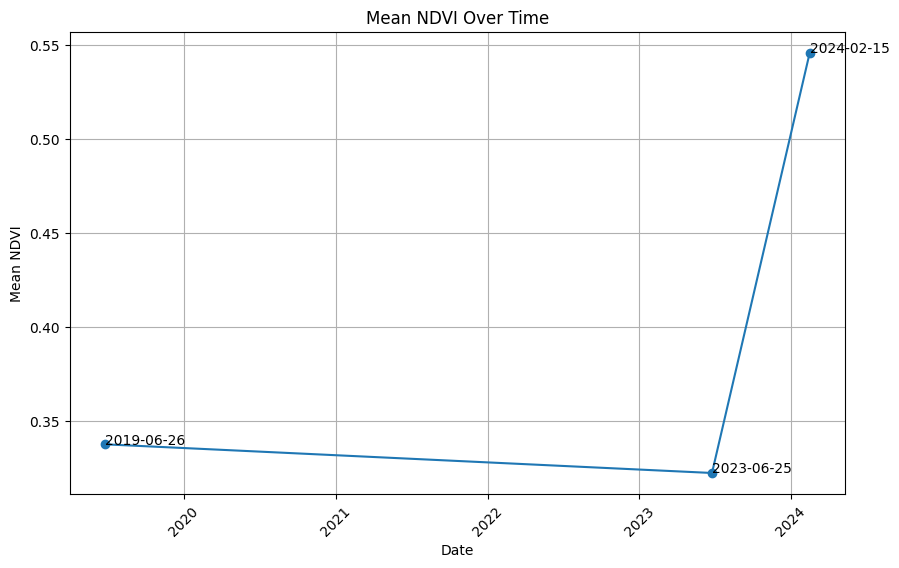

In [67]:
import matplotlib.pyplot as plt
from datetime import datetime

def plot_ndvi_against_time(directory, mean_ndvi_values):
    """
    Plotting mean ndvi data against time.Time is given in the filename and this function also extracts that
    Parameters:
    directory(str):The directory to the data folder
    mean_ndvi_values(list):The data as list of mean_ndvi_values for each image
    Returns:
    None
    
    """
    # Extracting dates from filenames
    dates = []
    for filename in sorted(os.listdir(directory)):
        if filename.endswith(".tiff"):
            date = extract_date_from_filename(filename)
            dates.append(date)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(dates, mean_ndvi_values, marker='o', linestyle='-')
    plt.title('Mean NDVI Over Time')
    plt.xlabel('Date')
    plt.ylabel('Mean NDVI')
    plt.xticks(rotation=45)
    plt.grid(True)

    # Annotating each point with its date
    for i, date in enumerate(dates):
        plt.annotate(date.strftime('%Y-%m-%d'), (dates[i], mean_ndvi_values[i]))

    plt.show()


directory_path = 'data'  
plot_ndvi_against_time(directory_path, mean_ndvi_values)

<h1>Observation</h1>
<p>From the above graph we can observe that mean ndvi value decreases from 2019 to 2023 but in 2024 there is a sharp increase of the ndvi value</p>
<p>The sharp increase in gap of 8 months seems a bit abnormal to me.I think the first two images are collected during the mid of the year (in June month) and the last image is collected in February. Weather might affect the amount of light reflected to satellite and might have affected the value of band frequency or wavelength of the near-infrared band and typically during February,it remains Winter and thus there is a low reflection of red channel compared to NIR channel and thus it yields high NDVI value.Even from images it can be said that the amount of barren land in last image is more than rest two.So I think data collection method is not consistent.</p>

<p>However, I will still work with the given data and will try to find further insights</p>

In [68]:

#I have redo the above but this time with plotly to make it looks a bit better and provide some bit of interactivity
def plot_ndvi_against_time_plotly(directory, mean_ndvi_values):
    # Extracting dates from filenames
    """
    Plotting mean_ndvi_value against time.This time I am doing it with plotly
    
    Parameters:
    directory(str):The directory to the data folder
    mean_ndvi_values(list):The data as list of mean_ndvi_values for each image
    
    Returns:
    None

    """
    dates = []
    for filename in sorted(os.listdir(directory)):
        if filename.endswith(".tiff"):
            date = extract_date_from_filename(filename)
            dates.append(date)

    # Creating figure
    fig = go.Figure()

    # Adding a scatter plot
    fig.add_trace(go.Scatter(x=dates, y=mean_ndvi_values, mode='lines+markers',
                             name='Mean NDVI', marker=dict(size=8)))

    # Updating layout
    fig.update_layout(
        title='Mean NDVI Over Time with Plotly',
        xaxis_title='Date',
        yaxis_title='Mean NDVI',
        xaxis=dict(
            tickmode='auto',
            nticks=len(dates),
            tickformat='%Y-%m-%d'
        )
    )

    # Showing the plot
    fig.show()


directory_path = 'data' 
plot_ndvi_against_time_plotly(directory_path, mean_ndvi_values)

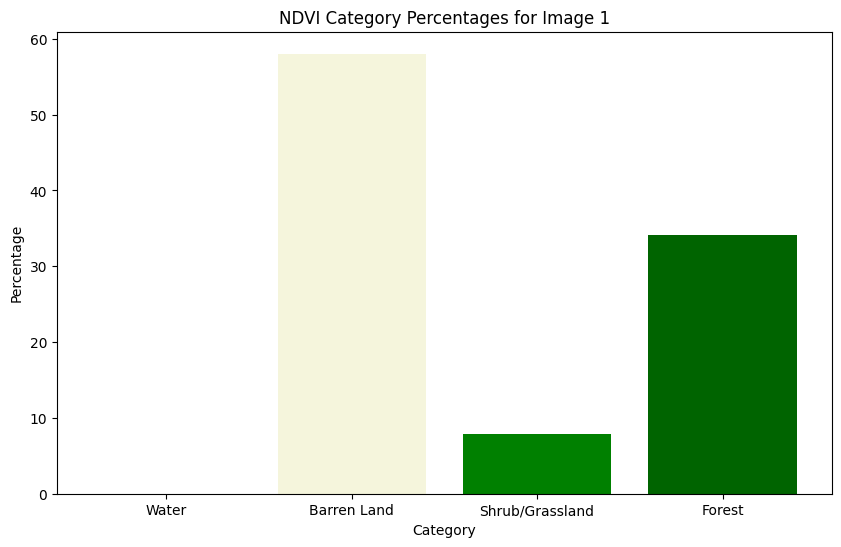

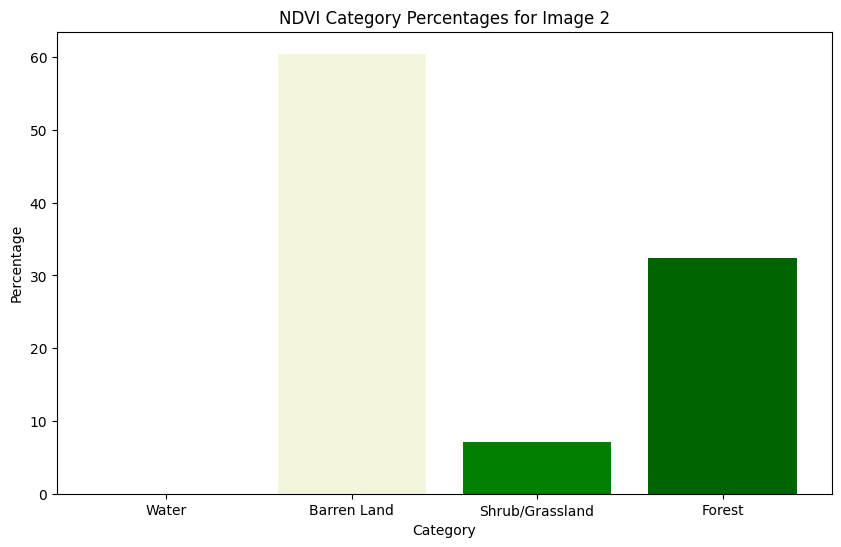

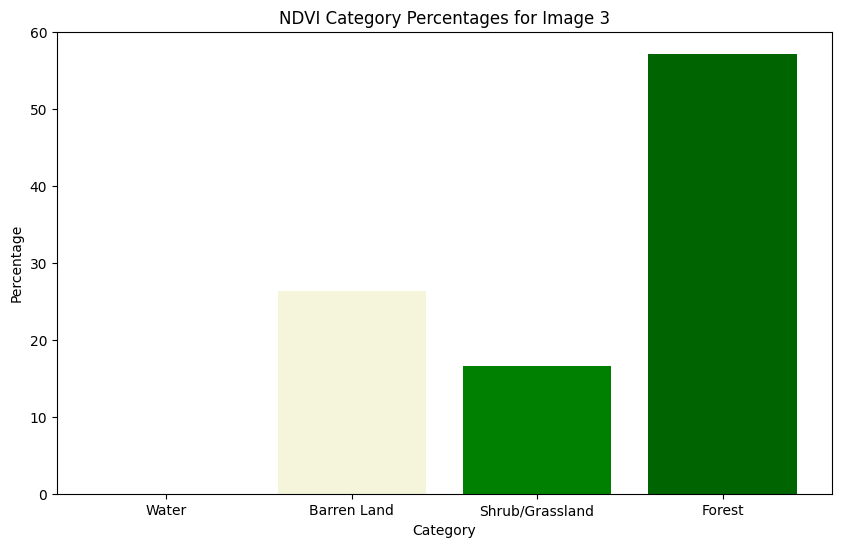

In [69]:
import matplotlib.pyplot as plt
import numpy as np

def categorize_pixel(ndvi_value):
    """
    Based on the ndvi value , categorising to different components
    
    Parameters:
    ndvi_value(np.ndarray):Ndvi_value as numpy array
    
    Returns:
    str:Name of the components
    
    """
    
    
    if ndvi_value < -0.1:
        return "Water"
    elif -0.1 <= ndvi_value <= 0.1:
        return "Barren Land"
    elif 0.1 < ndvi_value <= 0.4:
        return "Shrub/Grassland"
    else:
        return "Forest"

def calculate_pixel_percentages(ndvi_data):
    """
    Calculate how much percentage of component is present in an image.
    Parametes:
    ndvi_value(np.ndarray):Ndvi_value as numpy array
    
    Returns:
    dictionary:Maps the corresponding percentage to each category.
    
    """
    
    categories = ['Water', 'Barren Land', 'Shrub/Grassland', 'Forest']
    pixel_counts = {category: 0 for category in categories}

    for pixel in np.nditer(ndvi_data):
        pixel_category = categorize_pixel(pixel)
        pixel_counts[pixel_category] += 1

    total_pixels = ndvi_data.size
    percentages = {category: (count / total_pixels) * 100 for category, count in pixel_counts.items()}
    return percentages

def plot_category_percentages(ndvi_data_list):
    """
    Plotting histograms to show the amount of each of the category in an image.
    
    Parametes:
    ndvi_value(np.ndarray):Ndvi_value as numpy array
    
    Returns:
    None
    
    """
    
    category_colors = {'Water': 'blue', 'Barren Land': 'beige', 'Shrub/Grassland': 'green', 'Forest': 'darkgreen'}
    
    for i, ndvi_data in enumerate(ndvi_data_list):
        percentages = calculate_pixel_percentages(ndvi_data)
        plt.figure(figsize=(10, 6))
        plt.bar(percentages.keys(), percentages.values(), color=[category_colors[cat] for cat in percentages.keys()])
        plt.title(f"NDVI Category Percentages for Image {i+1}")
        plt.ylabel('Percentage')
        plt.xlabel('Category')
        plt.show()


plot_category_percentages(ndvi_data_list)


In [70]:


def plot_category_percentages_with_plotly(ndvi_data_list):
    
    """
    Plotting histograms with plotly to show the amount of each of the category in an image.
    
    Parametes:
    ndvi_value(np.ndarray):Ndvi_value as numpy array
    
    Returns:
    None
    
    """
    
    
    category_colors = {'Water': 'blue', 'Barren Land': 'beige', 'Shrub/Grassland': 'green', 'Forest': 'darkgreen'}
    
    for i, ndvi_data in enumerate(ndvi_data_list):
        percentages = calculate_pixel_percentages(ndvi_data)
        
        fig = go.Figure(data=[
            go.Bar(x=list(percentages.keys()), y=list(percentages.values()), 
                   marker_color=[category_colors[cat] for cat in percentages.keys()])
        ])

        fig.update_layout(
            title=f"NDVI Category Percentages for Image {i+1}",
            xaxis_title="Category",
            yaxis_title="Percentage",
            template="plotly_dark"
        )
        
        fig.show()


plot_category_percentages_with_plotly(ndvi_data_list)


<h1>Observation</h1>
<p>From the histograms above we can observe that the percentage of barren land increases from 2019 to 2023 but it decreases greatly in 2024. The same is true for shrub and forest. I think this behaviour is because the data is not collected along the same time of the year.Thus now if we ignore the image from 2024, then we can clearly see that the amount of barren land increases and the gwoth of vegetation decreases.</p>



<h1>KNN Classifier</h1>
<p>Next I tried to run knn on the ndvi data where the nearing value in ndvi array would represent a certain classes and from which we could have gain some idea of how the ndvi value is spread of the classes which which classes is dominant in the images.</p><br>
<p>
    Here with classes I mean the category based on the ndvi values such as :<br>
    (taken from the project github page):<br>
The value range of the NDVI is -1 to 1. Negative values of NDVI (values approaching -1) correspond to water. Values close to zero (-0.1to 0.1) generally correspond to barren areas of rock, sand, or snow. Low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1).    
</p><br><br>
<p>It was taking a long time to process the data so I had to stop the kernel.<p>

In [71]:
# from sklearn.neighbors import KNeighborsClassifier
# import matplotlib.pyplot as plt
# import numpy as np

# def knn_classification_and_scatter_plot(ndvi_data_list, n_neighbors=5):
#     # Define NDVI thresholds for different categories
#     categories = {'Water': [-1, -0.1], 'Barren Land': [-0.1, 0.1], 'Shrub/Grassland': [0.2, 0.4], 'Forest': [0.4, 1]}
#     category_labels = {cat: i for i, cat in enumerate(categories.keys())}
    
#     for i, ndvi_data in enumerate(ndvi_data_list):
#         # Flatten NDVI data
#         X = ndvi_data.flatten().reshape(-1, 1)
#         y = np.zeros(X.shape[0])

#         # Assign labels based on NDVI value
#         for cat, (low, high) in categories.items():
#             y[(X[:, 0] >= low) & (X[:, 0] <= high)] = category_labels[cat]

#         # KNN Classifier
#         knn = KNeighborsClassifier(n_neighbors=n_neighbors)
#         knn.fit(X, y)
#         y_pred = knn.predict(X)

#         # Reshape for plotting
#         y_pred_image = y_pred.reshape(ndvi_data.shape)

#         # Plotting
#         plt.figure(figsize=(8, 6))
#         plt.scatter(np.where(y_pred_image != 0)[1], np.where(y_pred_image != 0)[0], c=y_pred[y_pred != 0], s=1)
#         plt.title(f'kNN Classification for Image {i + 1}')
#         plt.show()


# knn_classification_and_scatter_plot(ndvi_data_list)


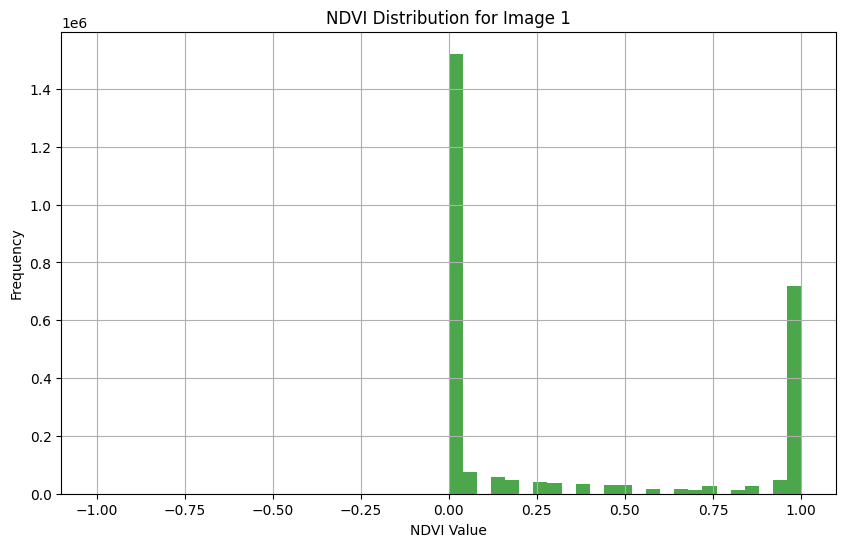

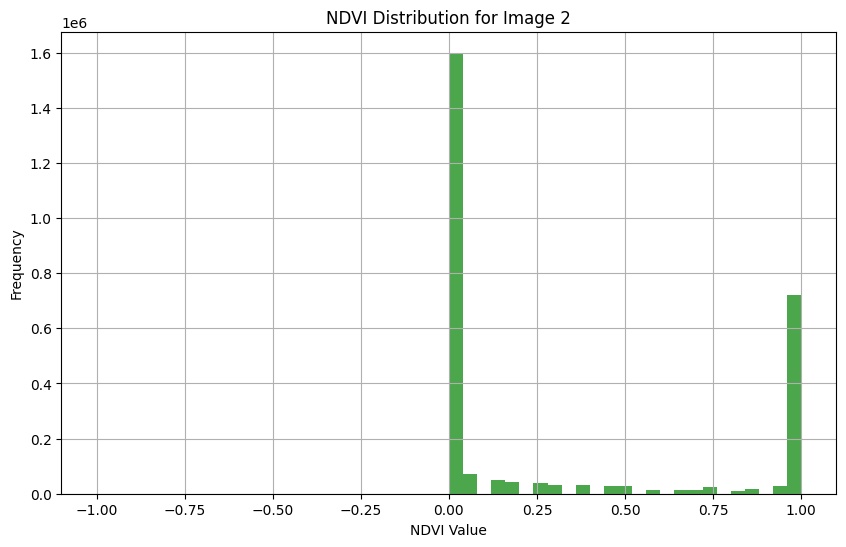

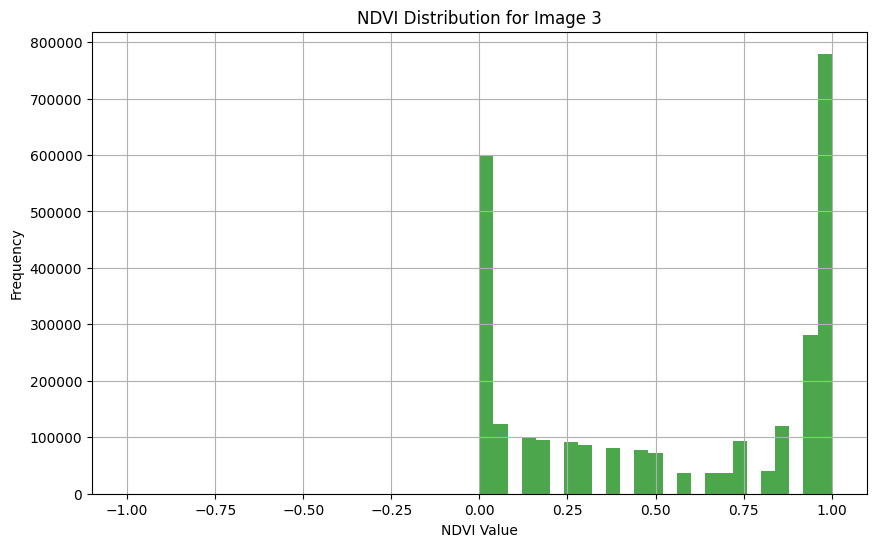

In [72]:

"""
Since I could not execute the KNN properly , I tried to visualize the distribution of ndvi values
in each of the images using the code below
"""


for i, ndvi_data in enumerate(ndvi_data_list):
    plt.figure(figsize=(10, 6))
    plt.hist(ndvi_data.ravel(), bins=50, range=(-1, 1), color='green', alpha=0.7)
    plt.title(f'NDVI Distribution for Image {i+1}')
    plt.xlabel('NDVI Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


<h1>Observation</h1>
<ul>
    <li>
        <h4>Image 01:</h4>
        <p>More values are near 0 which indicates high proportion of barren land compared to green areas</p>
         </li>
    <li>
                <h4>Image 02:</h4>
        <p>Compared to image 01 , more values are near zero which indicates increase of barren land and also less points around 1 which indicates decreases in vegetation</p>
         </li>
    <li>
        <h4>Image 03:</h4>
        <p>Compared to image 01 and image02 , the frequency of value near zero increases but freequency of value near 1 increases which indicates barren land decreases and green area increases</p>
         </li>
   

</ul>


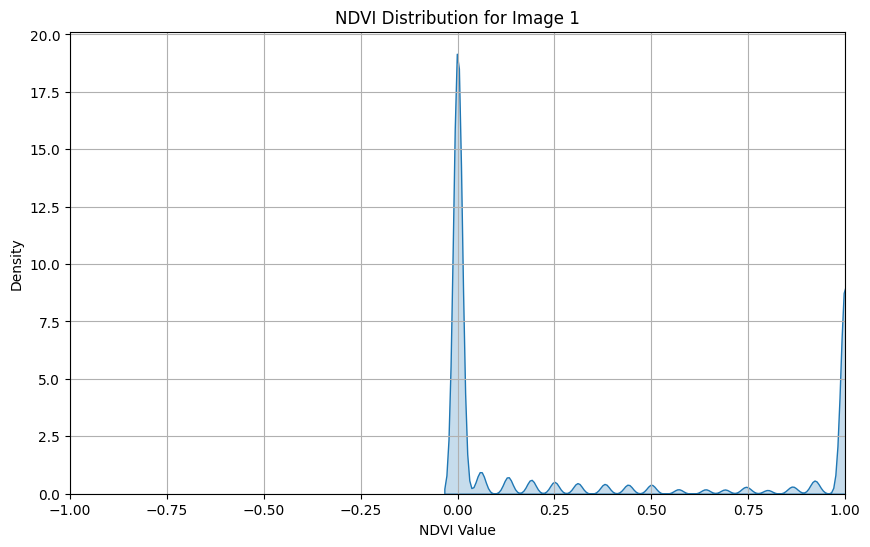

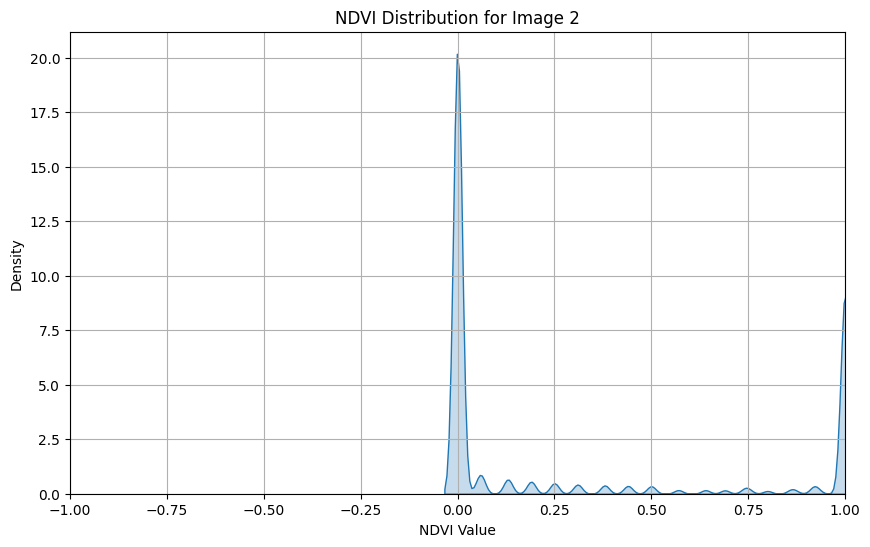

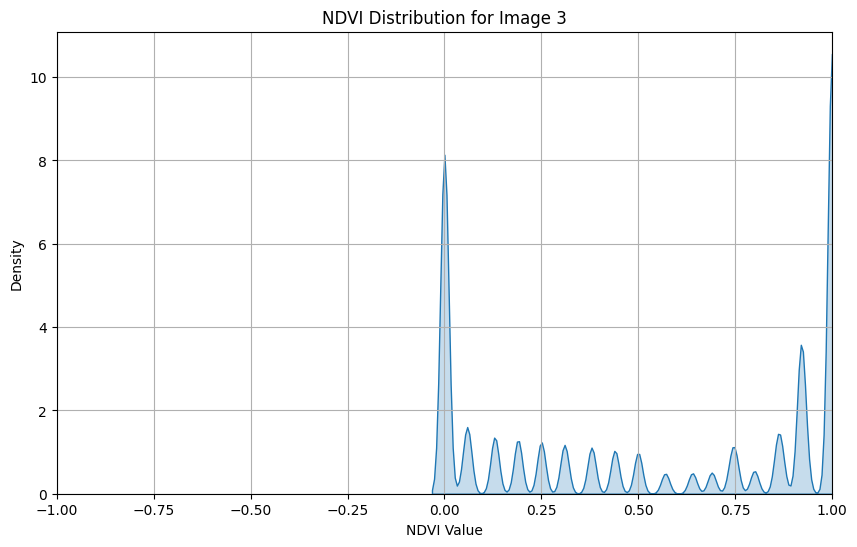

In [73]:


"""
Here I have again tried to see the distribution of ndvi values for each of the images
This time I tried this with seaborn
"""


for i, ndvi_data in enumerate(ndvi_data_list):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(ndvi_data.ravel(), bw_adjust=0.5, fill=True)
    plt.title(f'NDVI Distribution for Image {i+1}')
    plt.xlabel('NDVI Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.xlim(-1, 1)  
    plt.show()


In [74]:


def plot_category_distributions_with_plotly(ndvi_data_list,i):
    """
    Plotting interactive line plots with plotly to show the distribution of each category across images.
    
    Parameters:
    ndvi_data_list (list of np.ndarray): List of NDVI data arrays.
    
    Returns:
    None
    """
    
    category_colors = {'Water': 'blue', 'Barren Land': 'beige', 'Shrub/Grassland': 'green', 'Forest': 'darkgreen'}
    category_percentages = {cat: [] for cat in category_colors.keys()}

    for ndvi_data in ndvi_data_list:
        percentages = calculate_pixel_percentages(ndvi_data)
        for cat in category_colors.keys():
            category_percentages[cat].append(percentages.get(cat, 0))

    fig = go.Figure()

    for cat, percentages in category_percentages.items():
        fig.add_trace(go.Scatter(
            x=list(range(1, len(ndvi_data_list) + 1)),
            y=percentages,
            mode='lines+markers',
            name=cat,
            line=dict(color=category_colors[cat])
        ))

    fig.update_layout(
        title=f"NDVI Category Distributions Across Image{i}",
        yaxis_title="Percentage",
        template="plotly_dark"
    )

    fig.show()






In [75]:
i=0
for ndvi_data in ndvi_data_list:
    plot_category_distributions_with_plotly(ndvi_data,i)
    i+=1
    


<h1>Observation</h1>
<p>
    From above Line graph, we can also see the trend of how barren land increases in first two images but in the last image it decreases significantly.
</p>